<a href="https://colab.research.google.com/github/Shafiq-Abdu/Tutorial/blob/main/neural_networks_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow numpy matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


Neural model sequentially

1.Sequential model: We define a sequential model which means the layers are added one after another.

2.Flatten layer: Converts the 2D 28x28 pixel image into a 1D vector of 784 values.

3.Dense layer: A fully connected layer with 128 neurons and the ReLU (Rectified .Linear Unit) activation function. ReLU introduces non-linearity to the model, allowing it to learn more complex patterns.

4.Output layer: Another fully connected layer with 10 neurons (one for each digit from 0 to 9) and the softmax activation function, which outputs probabilities that the input image belongs to each class (digit)

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into a 784-dimensional vector
    Dense(128, activation='relu'),  # Dense layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons for each digit and softmax activation
])


In [ ]:
model

Compile the model: This step configures the model for training.

Optimizer: The adam optimizer is a popular choice for training neural networks as it adapts the learning rate during training.

Loss function: sparse_categorical_crossentropy is used for multi-class classification problems where the labels are integers.

Metrics: We specify accuracy as the metric to monitor during training and evaluation.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Epoch is number of times iteration is done, data is feeded again and again

In [ ]:
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0371 - accuracy: 0.9878
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0300 - accuracy: 0.9908
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0249 - accuracy: 0.9923
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0205 - accuracy: 0.9934
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0175 - accuracy: 0.9946
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0140 - accuracy: 0.9954
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0122 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0112 - accuracy: 0.9963
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0084 - accuracy: 0.9976
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.009

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.9790
Test accuracy: 0.9789999723434448


Now work on test images

In [ ]:
import matplotlib.pyplot as plt

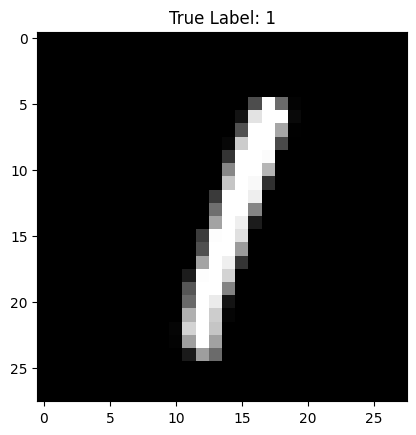

In [ ]:
image_index = 5  # Change this index to test different images
test_image = x_test[image_index]

# Display the image
plt.imshow(test_image, cmap='gray')
plt.title(f"True Label: {y_test[image_index]}")
plt.show()


Now apply model on it, resize and check.

In [ ]:
import numpy as np

In [ ]:
# Reshape the image to match the input shape of the model
test_image = np.expand_dims(test_image, axis=0)  # Shape (1, 28, 28)

# Make a prediction
predictions = model.predict(test_image)

# Print the predicted class
predicted_class = np.argmax(predictions)
print(f"Predicted Label: {predicted_class}")

1/1 [==============================] - 0s 21ms/step
Predicted Label: 1


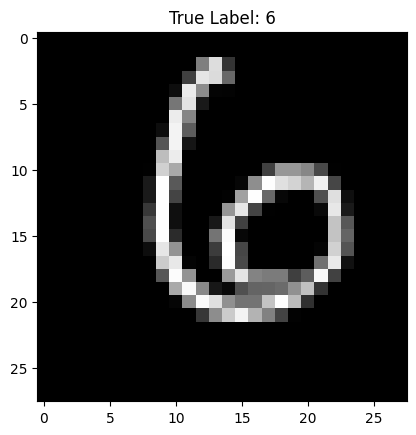

1/1 [==============================] - 0s 21ms/step
Predicted Label: 6


In [ ]:
image_index = 100 # Change this index to test different images
test_image = x_test[image_index]


plt.imshow(test_image, cmap='gray')
plt.title(f"True Label: {y_test[image_index]}")
plt.show()

test_image = np.expand_dims(test_image, axis=0)  # Shape (1, 28, 28)


predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)
print(f"Predicted Label: {predicted_class}")

We'll define a function for index

In [ ]:
def check(image_index):
    test_image = x_test[image_index]

    plt.imshow(test_image, cmap='gray')
    plt.title(f"True Label: {y_test[image_index]}")
    plt.show()

    # Reshape the image to match the input shape of the model
    test_image = np.expand_dims(test_image, axis=0)  # Shape (1, 28, 28)

    # Make a prediction
    predictions = model.predict(test_image)

    # Print the predicted class
    predicted_class = np.argmax(predictions)
    print(f"Predicted Label: {predicted_class}")

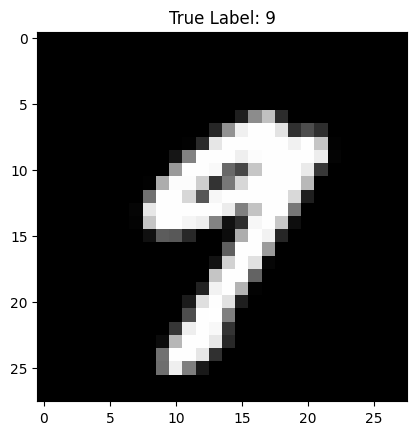

1/1 [==============================] - 0s 33ms/step
Predicted Label: 9


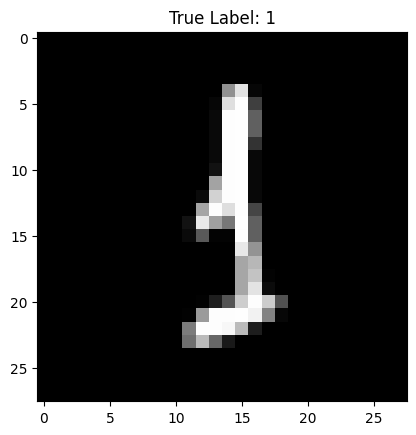

1/1 [==============================] - 0s 32ms/step
Predicted Label: 3


In [ ]:
check(20)
check(900)

Lets try custom images

In [ ]:
pip install Pillow


In [ ]:
from PIL import Image

In [ ]:
def predict_custom_image(image_path):
    # Load the custom image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels

    # Display the image
    plt.imshow(img, cmap='gray')
    plt.title("Custom Image")
    plt.show()

    # Convert the image to a numpy array and normalize it
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Shape (1, 28, 28)

    # Make a prediction
    predictions = model.predict(img_array)

    # Print the predicted class
    predicted_class = np.argmax(predictions)
    print(f"Predicted Label: {predicted_class}")

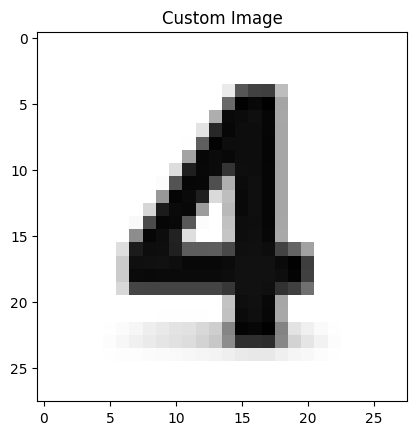

1/1 [==============================] - 0s 21ms/step
Predicted Label: 7


In [ ]:
# Predict the label for the custom image
custom_image_path = 'four.jpeg'
predict_custom_image(custom_image_path)

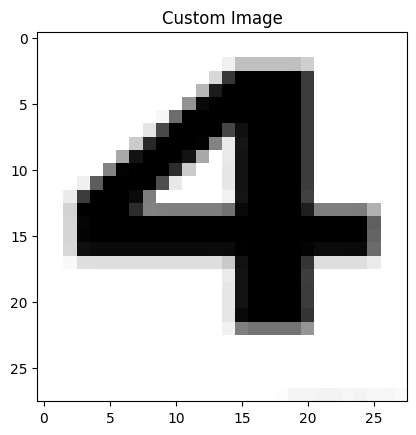

1/1 [==============================] - 0s 22ms/step
Predicted Label: 2


In [ ]:
custom_image_path = 'four1.png'
predict_custom_image(custom_image_path)

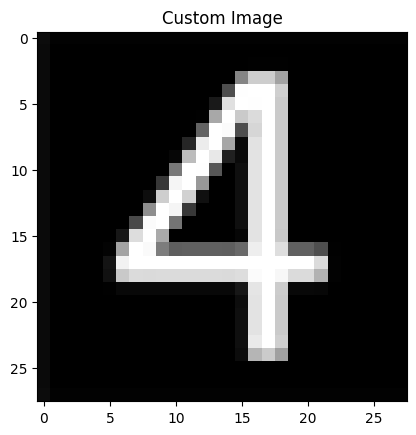

1/1 [==============================] - 0s 45ms/step
Predicted Label: 4


In [ ]:
custom_image_path = 'four2.jpg'
predict_custom_image(custom_image_path)

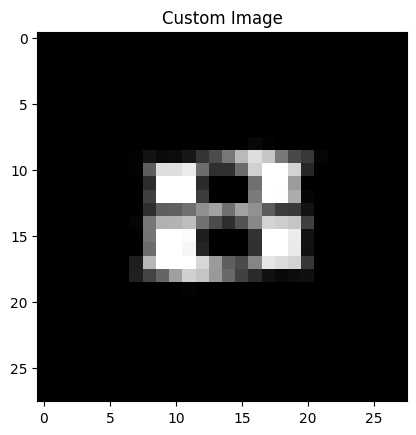

1/1 [==============================] - 0s 21ms/step
Predicted Label: 4


In [ ]:
custom_image_path = 'eight.png'
predict_custom_image(custom_image_path)

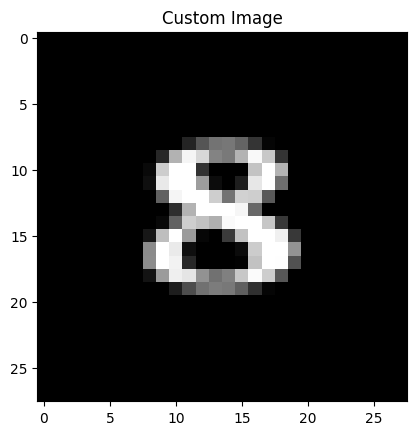

1/1 [==============================] - 0s 38ms/step
Predicted Label: 4


In [ ]:
custom_image_path = 'eight2.jpg'
predict_custom_image(custom_image_path)